# Predictive Model Development - Prosper Data Set
## Group 2 - David Sewall, Xingyao He, Brad Franklin, Susan Yu, Oscar Hernandez  

In [1]:
#Import modules necessary for this exercise
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 
### This section covers loading the initial data set and utilizing a variety of techniques to better understand the relationship between the variables 

In [2]:
#Import Prosper loan data
loans = pd.read_csv("prosperLoanData.csv") 

In [3]:
#Preview the first 5 lines of the data set 
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Output the shape of the data set
loans.shape

(113937, 81)

#### EDA - Part 1
#### Shows various plots of possible predictor variables 

Text(0,0.5,'Frequency')

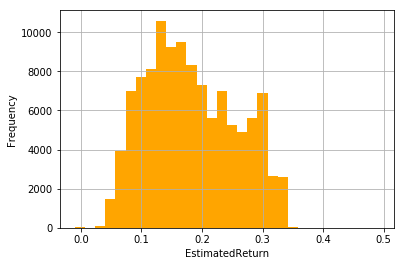

In [5]:
#Output LenderYield histogram
#We decided to start with this variable because it was most relevant to 
#the purpose of the models we will build 
loans.LenderYield.hist(bins = 30, color = "orange")
plt.xlabel("EstimatedReturn")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

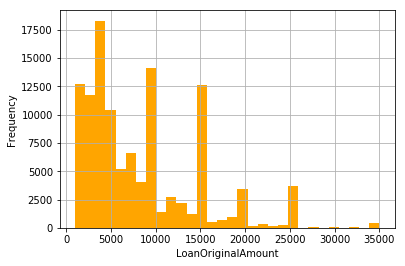

In [6]:
#Output the histogram of LoanOriginalAmount variable 
loans.LoanOriginalAmount.hist(bins = 30, color = "orange")
plt.xlabel("LoanOriginalAmount")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

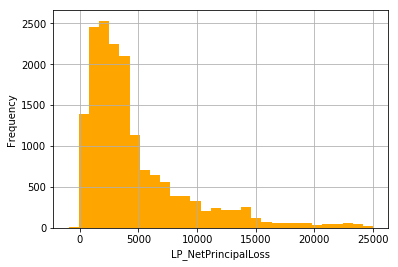

In [7]:
#Outout the histrogram of LP_NetPrincipleLoss variable  
loans_loss = loans[loans.LP_NetPrincipalLoss != 0]
loans_loss.LP_NetPrincipalLoss.hist(bins = 30, color = "orange")
plt.xlabel("LP_NetPrincipalLoss")
plt.ylabel("Frequency")

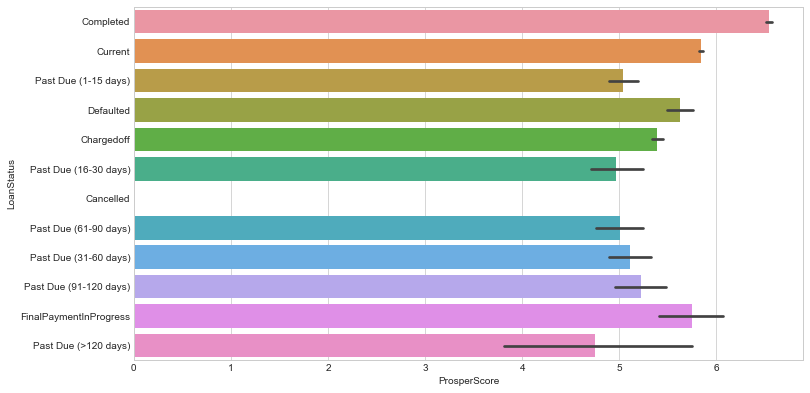

In [8]:
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (12, 6.5)})
sns.barplot(x="ProsperScore", y="LoanStatus", data=loans)

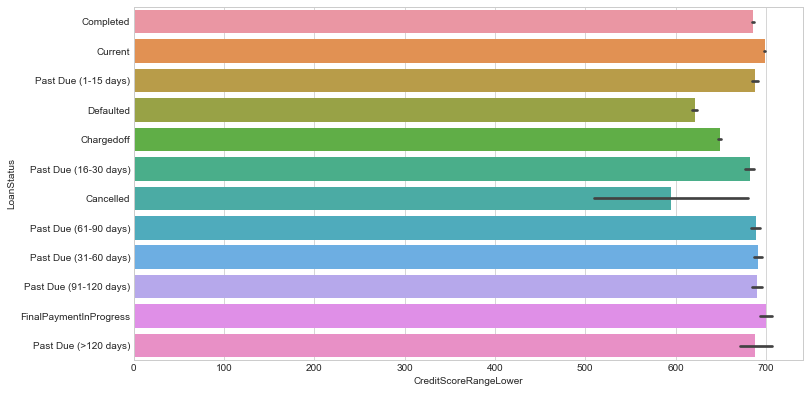

In [9]:
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=loans)

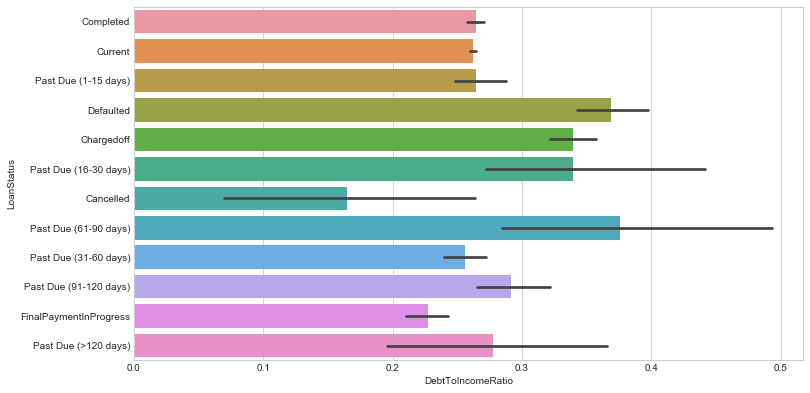

In [11]:
sns.barplot(x="DebtToIncomeRatio", y="LoanStatus", data=loans)

#### EDA - Part 2
#### Outputs the Value Counts of potential predictor variables 

In [12]:
#Output the count by ProsperScore
loans.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [13]:
#Output loans by EmploymentStatus
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [14]:
#Output # by Loan Status
loans['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [15]:
#Output loans by Homeowner status
loans.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

#### EDA - Part 3
#### Shows cross tables that show data between LoanStatus and other predictor variables 

In [16]:
loans.groupby(['ProsperScore', 'LoanStatus',])['LoanStatus'].size().unstack(fill_value=0)

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
ProsperScore,,,,,,,,,,,
1.0,235,341,337,37,2,13,8,5,4,10,0
2.0,377,848,4196,70,23,90,35,47,41,37,2
3.0,414,1077,5804,75,20,105,26,43,45,29,4
4.0,784,1828,9476,119,28,151,56,55,52,44,2
5.0,907,2212,6222,165,25,117,29,51,42,40,3
6.0,925,2847,7981,173,25,124,38,65,43,56,1
7.0,662,2357,7210,135,16,80,32,41,37,26,1
8.0,666,3711,7265,139,39,86,31,38,35,40,3
9.0,309,2836,3612,71,13,26,8,9,10,17,0


In [17]:
loans.groupby(['IsBorrowerHomeowner', 'LoanStatus',])['LoanStatus'].size().unstack(fill_value=0)

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
IsBorrowerHomeowner,,,,,,,,,,,,
False,3,6661,19794,26098,2744,95,429,137,179,134,177,8
True,2,5331,18280,30478,2274,110,377,128,184,179,127,8


In [18]:
loans.groupby(['CreditScoreRangeLower', 'LoanStatus',])['LoanStatus'].size().unstack(fill_value=0)

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
CreditScoreRangeLower,,,,,,,,,,,,
0.0,0,35,39,0,59,0,0,0,0,0,0,0
360.0,0,1,0,0,0,0,0,0,0,0,0,0
420.0,0,2,1,0,2,0,0,0,0,0,0,0
440.0,0,14,4,0,18,0,0,0,0,0,0,0
460.0,0,36,33,0,72,0,0,0,0,0,0,0
480.0,0,92,93,0,161,0,0,0,0,0,0,0
500.0,1,148,203,0,202,0,0,0,0,0,0,0
520.0,1,639,649,0,304,0,0,0,0,0,0,0
540.0,0,470,690,0,314,0,0,0,0,0,0,0


In [19]:
loans.groupby(['InquiriesLast6Months', 'LoanStatus',])['LoanStatus'].size().unstack(fill_value=0)

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
InquiriesLast6Months,,,,,,,,,,,,
0.0,1,3255,14778,29993,1006,86,338,121,153,132,136,6
1.0,2,2682,9430,14917,944,61,238,69,97,88,88,5
2.0,0,1788,5263,6346,708,29,117,42,54,42,42,1
3.0,0,1133,3006,2836,547,17,67,14,30,27,17,3
4.0,0,790,1788,1291,363,6,19,7,9,13,11,0
5.0,0,519,1097,639,308,3,16,6,9,7,5,1
6.0,0,416,677,341,215,1,3,2,6,2,1,0
7.0,0,298,444,95,163,2,6,2,0,2,2,0
8.0,0,213,311,50,119,0,0,0,3,0,0,0


In [20]:
loans.groupby(['PublicRecordsLast10Years', 'LoanStatus',])['LoanStatus'].size().unstack(fill_value=0)

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
PublicRecordsLast10Years,,,,,,,,,,,,
0.0,2,8284,29523,42777,3538,153,592,202,267,231,221,13
1.0,1,2696,6631,12047,959,45,177,57,82,68,69,2
2.0,0,538,969,1228,218,3,25,4,9,9,8,0
3.0,1,226,281,298,70,3,8,1,3,1,1,1
4.0,0,82,103,119,32,1,2,1,1,2,2,0
5.0,0,37,45,51,15,0,0,0,0,1,2,0
6.0,0,18,17,18,12,0,2,0,1,1,1,0
7.0,0,9,16,15,6,0,0,0,0,0,0,0
8.0,0,7,12,10,2,0,0,0,0,0,0,0


## Data Preparation
### This section covers variable transformation, fixing data issues and completing a train/test data split  

#### Data Preparation - Part 1
#### Covers all the data munging that was completed to arrive at data set that will be used to build models

In [21]:
#Output # of unique listing keys
len(loans.ListingKey.unique())

113048

In [22]:
#Output top duplicates
loans['ListingKey'].value_counts().head(10)

17A93590655669644DB4C06    6
47C1359638497431975670B    4
8474358854651984137201C    4
349D3587495831350F0F648    4
DE8535960513435199406CE    4
78D835971025680406A3489    3
FC5F3592110384244FC7BA7    3
85B8359189827433103090E    3
5EE93590643448155FDD18D    3
998535900520707355079B3    3
Name: ListingKey, dtype: int64

In [23]:
#Drop duplicate listing keys
loans = loans.drop_duplicates(subset='ListingKey', keep='last')

#Remove loans pre-2009 (those with a Prosper score of 0)
loans = loans[loans.ProsperScore > 0]


#Remove active loans since those are not necessary for building models 
loans = loans[(loans.LoanStatus == 'Completed') | 
             (loans.LoanStatus == 'Chargedoff') | 
             (loans.LoanStatus == 'Defaulted') ]

#Create flag for Completed=1, Defaulted and Chargedoff = 0
loans.replace(['Completed', 'Defaulted', 'Chargedoff'], 
                       [1, 0, 0], 
                       inplace=True)

In [24]:
#Output the updated shape of dataframe
loans.shape

(25987, 81)

In [25]:
#Calculate returned amount, which is the principle amount plus interest received minus fees
loans['return_amount'] = (
    loans.LoanOriginalAmount + 
    loans.LP_InterestandFees - 
    loans.LP_ServiceFees - 
    loans.LP_CollectionFees -
    loans.LP_NetPrincipalLoss)

#Calculate percent return
loans['return_pct'] = (
    loans.LoanOriginalAmount + 
    loans.LP_InterestandFees - 
    loans.LP_ServiceFees - 
    loans.LP_CollectionFees -
    loans.LP_NetPrincipalLoss)/(
    loans.LoanOriginalAmount)

#Calculate annualized percent return
loans['return_apr'] = (
    loans.return_pct**
    (12/loans.Term))

#limit to only loans with valid return data
loans = loans[loans.return_apr > 0]

In [26]:
#Create new dataframe for selected features
loans_df = pd.DataFrame([loans.return_apr,
    loans.ProsperScore,
    loans.IsBorrowerHomeowner,
    loans.CreditScoreRangeLower,
    loans.InquiriesLast6Months,
    loans.CurrentDelinquencies,
    loans.PublicRecordsLast10Years,
    loans.DebtToIncomeRatio,
    loans.LoanOriginalAmount]).transpose()

In [27]:
#Output the shape of the dataframe
loans_df.shape

(25805, 9)

In [28]:
#Reset the index of the dataframe
loans_df=loans_df.reset_index(drop=True)

In [29]:
#Make sure the dataframe indexes are changed 
loans_df.head()

,return_apr,ProsperScore,IsBorrowerHomeowner,CreditScoreRangeLower,InquiriesLast6Months,CurrentDelinquencies,PublicRecordsLast10Years,DebtToIncomeRatio,LoanOriginalAmount
0,0.510108,5.0,1.0,700.0,0.0,0.0,1.0,0.49,4000.0
1,0.493858,5.0,0.0,680.0,0.0,0.0,0.0,0.39,2000.0
2,1.035018,3.0,0.0,660.0,2.0,0.0,0.0,0.11,4000.0
3,1.052157,9.0,1.0,700.0,2.0,0.0,0.0,0.26,4000.0
4,1.024544,9.0,0.0,740.0,0.0,1.0,1.0,0.11,10000.0


In [30]:
#Output the type of variables in our dataframe
loans_df.dtypes

return_apr                  float64
ProsperScore                float64
IsBorrowerHomeowner         float64
CreditScoreRangeLower       float64
InquiriesLast6Months        float64
CurrentDelinquencies        float64
PublicRecordsLast10Years    float64
DebtToIncomeRatio           float64
LoanOriginalAmount          float64
dtype: object

In [31]:
#Turn all observations with infinite data into NaN
loans_df=loans_df.replace([np.inf, -np.inf], np.nan)

In [32]:
#Remove observations with NaN data 
loans_df=loans_df.replace([np.inf, -np.inf], np.nan).dropna()

In [33]:
#Output the shape of the new dataframe
loans_df.shape

(22871, 9)

In [61]:
loans_df.describe()

,return_apr,ProsperScore,IsBorrowerHomeowner,CreditScoreRangeLower,InquiriesLast6Months,CurrentDelinquencies,PublicRecordsLast10Years,DebtToIncomeRatio,LoanOriginalAmount
count,22871.000000,22871.000000,22871.000000,22871.000000,22871.000000,22871.000000,22871.000000,22871.000000,22871.000000
mean,0.987970,6.429496,0.534826,701.609025,1.201084,0.379695,0.265576,0.248358,6523.235101
std,0.168601,2.280601,0.498797,53.409502,1.622915,1.246994,0.610178,0.378624,4884.398714
min,0.039317,1.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,1.006447,5.000000,0.000000,660.000000,0.000000,0.000000,0.000000,0.130000,3000.000000
50%,1.038657,7.000000,1.000000,700.000000,1.000000,0.000000,0.000000,0.200000,5000.000000
75%,1.076169,8.000000,1.000000,740.000000,2.000000,0.000000,0.000000,0.300000,8600.000000
max,1.387265,11.000000,1.000000,880.000000,22.000000,32.000000,12.000000,10.010000,35000.000000


In [34]:
#Create training and validation data sets

#Split loans_df into X and y variables 
X = loans_df.drop("return_apr", axis =1)
y = loans_df["return_apr"].copy()

#Split into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state =10)

#### Data Preparation - Section 2 
#### Output various plots with regards to the dependent variable, return_apr 

Text(0,0.5,'Frequency')

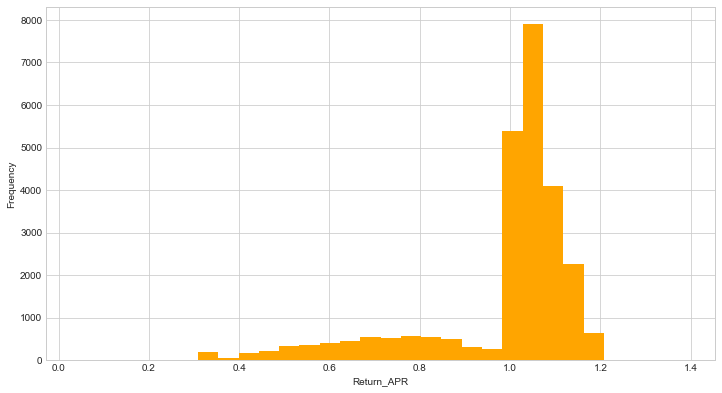

In [35]:
#Our final two graphs will be a histogram of the return_apr variable
#and a correlation heat map with certain predictor variables 
loans.return_apr.hist(bins = 30, color = "orange")
plt.xlabel("Return_APR")
plt.ylabel("Frequency")

<Figure size 864x468 with 0 Axes>

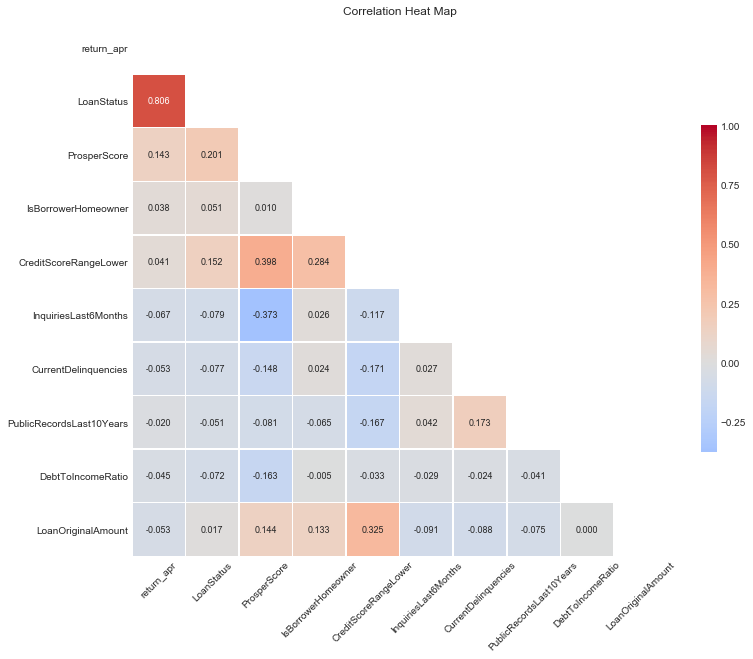

In [36]:
#Create correlation heat map 
loans_features = pd.DataFrame([loans.return_apr,
    loans.LoanStatus,
    loans.ProsperScore,
    loans.IsBorrowerHomeowner,
    loans.CreditScoreRangeLower,
    loans.InquiriesLast6Months,
    loans.CurrentDelinquencies,
    loans.PublicRecordsLast10Years,
    loans.DebtToIncomeRatio,
    loans.LoanOriginalAmount,]).transpose()

corr = (loans_features.corr())
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None) 
    
corr_chart(df_corr = loans_features)
plt.show()

## Model Training and Testing 
### This section covers training two different models, using K-Fold cross validation, testing both models and then outputting Feature Importance metrics

In [37]:
#Build Gradient Boosted Regression Trees (GBRT)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state =50)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state = 50)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=116, presort='auto', random_state=50,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
#Use K-Fold CV on the training data set 
gbrt_scores = cross_val_score(gbrt_best, X_train, y_train, 
                               scoring="neg_mean_squared_error", cv=8)

gbrt_rmse_scores = np.sqrt(-gbrt_scores)

In [39]:
#Create function to display the RMSE score statistics for each model 
def display_scores(scores):
    print ("Scores:", scores)
    print ("Mean:", scores.mean())
    print ("Standard Deviation:", scores.std())

In [40]:
print("GBRT RMSE for Training Data Set")
display_scores(gbrt_rmse_scores)

GBRT RMSE for Training Data Set
Scores: [ 0.16930808  0.16432865  0.17095977  0.1697881   0.16397783  0.16950068
  0.15682411  0.1629212 ]
Mean: 0.165951050952
Standard Deviation: 0.0045095228334


In [41]:
#Make predictions using GBRT model using test set 
gbrt_predictions = gbrt_best.predict(X_val)

In [42]:
#Output test set RMSE scores for GBRT model 
gbrt_test_mse = mean_squared_error(y_val, gbrt_predictions)
gbrt_test_rmse = np.sqrt(gbrt_test_mse)
print("gbrt_test_rmse:", gbrt_test_rmse, "\n")

gbrt_test_rmse: 0.163085160765 



In [43]:
#Create object to hold feature importance for GBRT model 
gbrt_feature_importances = pd.DataFrame(gbrt_best.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

In [44]:
#Print out the feature importance from the GBRT model 
gbrt_feature_importances

,Feature Importance
LoanOriginalAmount,0.272029
DebtToIncomeRatio,0.183021
InquiriesLast6Months,0.144708
CurrentDelinquencies,0.121222
ProsperScore,0.114102
CreditScoreRangeLower,0.079409
PublicRecordsLast10Years,0.045554
IsBorrowerHomeowner,0.039955


In [45]:
#Build Random Forest Regression Model (RF)
rf_reg = RandomForestRegressor(n_estimators=500, max_features=6, bootstrap = True, n_jobs=-1, random_state = 99)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=99,
           verbose=0, warm_start=False)

In [46]:
#Use K-Fold CV on the training data set 
rf_scores = cross_val_score(rf_reg, X_train, y_train, 
                               scoring="neg_mean_squared_error", cv=8)

rf_rmse_scores = np.sqrt(-rf_scores)

In [47]:
print("RF RMSE for Training Data Set")
display_scores(rf_rmse_scores)

RF RMSE for Training Data Set
Scores: [ 0.17654976  0.17126966  0.17709611  0.17682814  0.17141403  0.17761182
  0.16736773  0.1701328 ]
Mean: 0.173533755628
Standard Deviation: 0.00368232243503


In [48]:
#Make predictions using RF model using test set 
rf_predictions = rf_reg.predict(X_val)

In [49]:
#Output test set RMSE scores for RF model 
rf_test_mse = mean_squared_error(y_val, rf_predictions)
rf_test_rmse = np.sqrt(rf_test_mse)
print("rf_test_rmse:", rf_test_rmse, "\n")

rf_test_rmse: 0.171205051469 



In [50]:
#Create object to hold feature importance for RF model 
rf_feature_importances = pd.DataFrame(rf_reg.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

In [51]:
#Print out the feature importance from the RF model 
rf_feature_importances

,Feature Importance
DebtToIncomeRatio,0.291816
LoanOriginalAmount,0.175867
CreditScoreRangeLower,0.159747
InquiriesLast6Months,0.118147
ProsperScore,0.111071
CurrentDelinquencies,0.055467
PublicRecordsLast10Years,0.050751
IsBorrowerHomeowner,0.037134


## Miscellaneous Tasks

In [52]:
#Code if you want to export file to CSV
#Create dataframe that needs to be exported 
rf_train_predictions = rf_reg.predict(X_train)

In [53]:
rf_train_predictions = pd.DataFrame(rf_train_predictions)
rf_train_predictions.columns = ['pred_return_apr']
rf_train_predictions.head()

,pred_return_apr
0,1.015105
1,0.989646
2,1.019749
3,0.995633
4,1.064865


In [54]:
#Export files to CSV 
rf_train_predictions.to_csv('predictions.csv')
X_train.to_csv('X_train.csv')

In [58]:
X_predictions = rf_reg.predict(X)
X_predictions = pd.DataFrame(X_predictions)
X_predictions.to_csv("X_predictions.csv")